1. About Dataset
2. Load Libraries
3. Load And Explore Data(EDA)

    3.1. Checking for basic Statistics and info for Data Frame

    3.2. Building Histogram to check the Data Behaviour

    3.3. Performing Train Test Split

    
About Dataset

Load Libraries

Load And Explore Data(EDA)

3.1. Checking for basic Statistics and info for Data Frame

3.2. Building Histogram to check the Data Behaviour

3.3. Performing Train Test Split

About this Dataset https://www.kaggle.com/code/sandeshsingh4/**smoke**-detection-using-classification-models/data

Target Variable : Fire Alarm

Feature Description

1- UTC : The time when experiment was performed.

2- Temperature : Temperature of Surroundings. Measured in Celsius

3- Humidity : The air humidity during the experiment.

4- TVOC : Total Volatile Organic Compounds. Measured in ppb (parts per billion)

5- eCo2 : CO2 equivalent concentration. Measured in ppm (parts per million)

6- Raw H2 : The amount of Raw Hydrogen present in the surroundings.

7- Raw Ethanol : The amount of Raw Ethanol present in the surroundings.

8- Pressure : Air pressure. Measured in hPa

9- PM1.0 : Paticulate matter of diameter less than 1.0 micrometer .

10- PM2.5 : Paticulate matter of diameter less than 2.5 micrometer.

11- NC0.5 : Concentration of particulate matter of diameter less than 0.5 micrometers.

12- NC1.0 : Concentration of particulate matter of diameter less than 1.0 micrometers.

13- NC2.5 : Concentration of particulate matter of diameter less than 2.5 micrometers.

14- CNT : Simple Count.

15- Fire Alarm : (Reality) If fire was present then value is 1 else it is 0.

Load Libraries

[105]
2s
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
[1]
2s
##### Scikit Learn modules needed for Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

# Plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

## Below packages are needed for Hyper Parameter Tuning of an Algorithm in Scikit Learn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
1. Load And Explore Data(EDA)

[5]
0s
df = pd.read_csv("/content/smoke_detection_iot.csv")
df.head(2)

[76]
0s
df['Fire Alarm'].value_counts().plot(kind='bar')

Fire Alarm : (Reality) If fire was present then value is 1 else it is 0.

[83]
0s
df['Fire Alarm'].value_counts().plot(kind='pie',autopct='%1.2f%%',startangle=90,)

[102]
1s
sns.distplot(df['Temperature[C]'],kde=True)

[103]
1s
sns.distplot(df['Humidity[%]'],kde=True)

[104]
0s
df1=df.copy()
[106]
2s
grouped_df = df1.drop("UTC", axis=1).groupby("Fire Alarm").agg("mean").reset_index()

px.bar(grouped_df, y=['TVOC[ppb]', 'Raw H2', 'Raw Ethanol', 'CNT'], barmode="group",
      width=800, labels={"index": "label"}, 
       title="Barplot for 'TVOC[ppb]', 'Raw H2', 'Raw Ethanol', 'CNT'")

Fire Alarm : (Reality) If fire was present then value is 1 else it is 0.

1.1. Checking for basic Statistics and info for Data Frame

[7]
0s
print(df.describe())
print(df.info())
print(df.isna().sum())
         Unnamed: 0           UTC  Temperature[C]   Humidity[%]     TVOC[ppb]  \
count  62630.000000  6.263000e+04    62630.000000  62630.000000  62630.000000   
mean   31314.500000  1.654792e+09       15.970424     48.539499   1942.057528   
std    18079.868017  1.100025e+05       14.359576      8.865367   7811.589055   
min        0.000000  1.654712e+09      -22.010000     10.740000      0.000000   
25%    15657.250000  1.654743e+09       10.994250     47.530000    130.000000   
50%    31314.500000  1.654762e+09       20.130000     50.150000    981.000000   
75%    46971.750000  1.654778e+09       25.409500     53.240000   1189.000000   
max    62629.000000  1.655130e+09       59.930000     75.200000  60000.000000   

          eCO2[ppm]        Raw H2   Raw Ethanol  Pressure[hPa]         PM1.0  \
count  62630.000000  62630.000000  62630.000000   62630.000000  62630.000000   
mean     670.021044  12942.453936  19754.257912     938.627649    100.594309   
std     1905.885439    272.464305    609.513156       1.331344    922.524245   
min      400.000000  10668.000000  15317.000000     930.852000      0.000000   
25%      400.000000  12830.000000  19435.000000     938.700000      1.280000   
50%      400.000000  12924.000000  19501.000000     938.816000      1.810000   
75%      438.000000  13109.000000  20078.000000     939.418000      2.090000   
max    60000.000000  13803.000000  21410.000000     939.861000  14333.690000   

              PM2.5         NC0.5         NC1.0         NC2.5           CNT  \
count  62630.000000  62630.000000  62630.000000  62630.000000  62630.000000   
mean     184.467770    491.463608    203.586487     80.049042  10511.386157   
std     1976.305615   4265.661251   2214.738556   1083.383189   7597.870997   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.340000      8.820000      1.384000      0.033000   3625.250000   
50%        1.880000     12.450000      1.943000      0.044000   9336.000000   
75%        2.180000     14.420000      2.249000      0.051000  17164.750000   
max    45432.260000  61482.030000  51914.680000  30026.438000  24993.000000   

         Fire Alarm  
count  62630.000000  
mean       0.714626  
std        0.451596  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB
None
Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64
Conclusion 1.1

Check all the basic statistics e.g. mean, median, std etc. We found there is lot of variance in the Data Min and Max value so we have to use Normalization the Data Further We can also see there no null values present in each column.

1.2. Building Histogram to check the Data Behaviour

[8]
7s
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
# x-axis is column Values and Y-axis is Total Counts
plt.show()

Conclusion 1.2

We can see some binary and continous values in different histograms and there behaviour

1.3. Performing Train Test Split

[9]
features = df.drop("Fire Alarm", axis =1) # droping Traget variable
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,df["Fire Alarm"],test_size=0.20,random_state=10)
print(f"x_train data is {x_train.shape}")
print(f"y_train data is {y_train.shape}")
print(f"x_test data is {x_test.shape}")
print(f"y_test data is {y_test.shape}")
x_train data is (50104, 15)
y_train data is (50104,)
x_test data is (12526, 15)
y_test data is (12526,)
Creating copy of X_train

[10]
0s
df_train_copy = x_train.copy()
1.4. Checking for Correlation for training set


**About this Dataset**
https://www.kaggle.com/code/sandeshsingh4/smoke-detection-using-classification-models/data

Target Variable : Fire Alarm

Feature Description

1- UTC : The time when experiment was performed.

2- Temperature : Temperature of Surroundings. Measured in Celsius

3- Humidity : The air humidity during the experiment.

4- TVOC : Total Volatile Organic Compounds. Measured in ppb (parts per billion)

5- eCo2 : CO2 equivalent concentration. Measured in ppm (parts per million)

6- Raw H2 : The amount of Raw Hydrogen present in the surroundings.

7- Raw Ethanol : The amount of Raw Ethanol present in the surroundings.

8- Pressure : Air pressure. Measured in hPa

9- PM1.0 : Paticulate matter of diameter less than 1.0 micrometer .

10- PM2.5 : Paticulate matter of diameter less than 2.5 micrometer.

11- NC0.5 : Concentration of particulate matter of diameter less than 0.5 
micrometers.

12- NC1.0 : Concentration of particulate matter of diameter less than 1.0 micrometers.

13- NC2.5 : Concentration of particulate matter of diameter less than 2.5 micrometers.

14- CNT : Simple Count.

15- Fire Alarm : (Reality) If fire was present then value is 1 else it is 0.

**Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
##### Scikit Learn modules needed for Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

# Plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

## Below packages are needed for Hyper Parameter Tuning of an Algorithm in Scikit Learn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

**1. Load And Explore Data(EDA)**

In [4]:
df = pd.read_csv("/content/smoke_detection_iot.csv")
df.head(2)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0


In [33]:
df['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

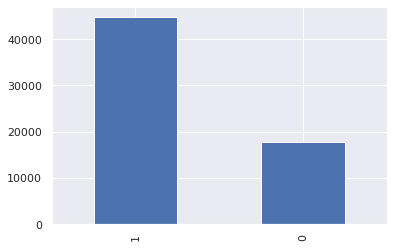

In [5]:
df['Fire Alarm'].value_counts().plot(kind='bar')

**Fire Alarm : (Reality) If fire was present then value is 1 else it is 0.**

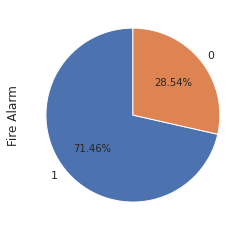

In [6]:
df['Fire Alarm'].value_counts().plot(kind='pie',autopct='%1.2f%%',startangle=90,)

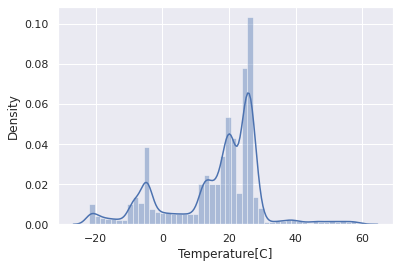

In [7]:
sns.distplot(df['Temperature[C]'],kde=True)

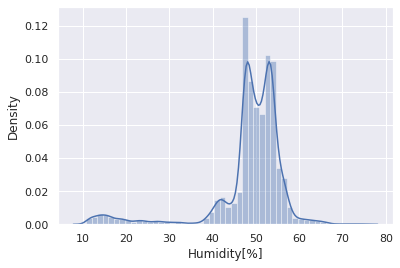

In [8]:
sns.distplot(df['Humidity[%]'],kde=True)

In [9]:
df1=df.copy()

In [10]:
grouped_df = df1.drop("UTC", axis=1).groupby("Fire Alarm").agg("mean").reset_index()

px.bar(grouped_df, y=['TVOC[ppb]', 'Raw H2', 'Raw Ethanol', 'CNT'], barmode="group",
      width=800, labels={"index": "label"}, 
       title="Barplot for 'TVOC[ppb]', 'Raw H2', 'Raw Ethanol', 'CNT'")

**Fire Alarm : (Reality) If fire was present then value is 1 else it is 0.**

**1.1. Checking for basic Statistics and info for Data Frame**

In [11]:
print(df.describe())
print(df.info())
print(df.isna().sum())

         Unnamed: 0           UTC  Temperature[C]   Humidity[%]     TVOC[ppb]  \
count  62630.000000  6.263000e+04    62630.000000  62630.000000  62630.000000   
mean   31314.500000  1.654792e+09       15.970424     48.539499   1942.057528   
std    18079.868017  1.100025e+05       14.359576      8.865367   7811.589055   
min        0.000000  1.654712e+09      -22.010000     10.740000      0.000000   
25%    15657.250000  1.654743e+09       10.994250     47.530000    130.000000   
50%    31314.500000  1.654762e+09       20.130000     50.150000    981.000000   
75%    46971.750000  1.654778e+09       25.409500     53.240000   1189.000000   
max    62629.000000  1.655130e+09       59.930000     75.200000  60000.000000   

          eCO2[ppm]        Raw H2   Raw Ethanol  Pressure[hPa]         PM1.0  \
count  62630.000000  62630.000000  62630.000000   62630.000000  62630.000000   
mean     670.021044  12942.453936  19754.257912     938.627649    100.594309   
std     1905.885439    272.464

**Conclusion 1.1**

Check all the basic statistics e.g. mean, median, std etc.
We found there is lot of variance in the Data Min and Max value so we have to use Normalization the Data Further
We can also see there no null values present in each column.

**1.2. Building Histogram to check the Data Behaviour**

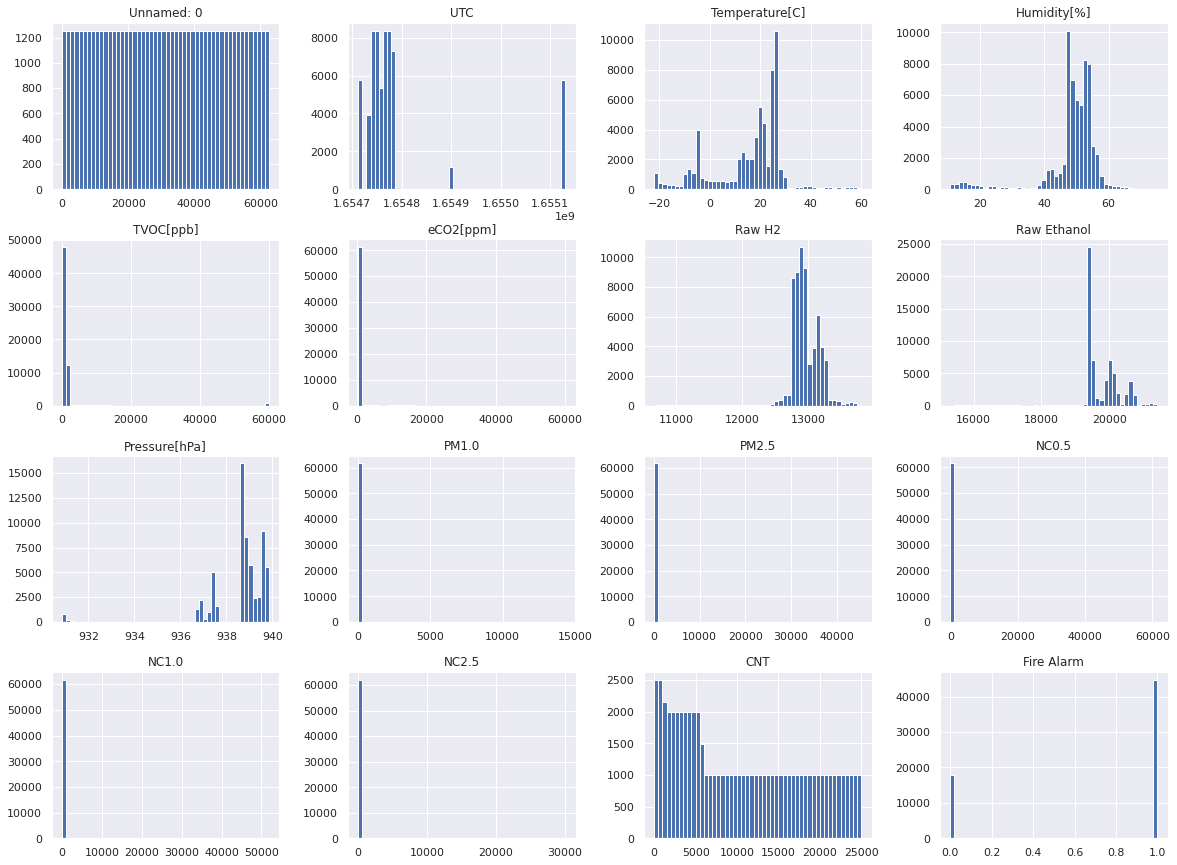

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
# x-axis is column Values and Y-axis is Total Counts
plt.show()

**Conclusion 1.2**

We can see some binary and continous values in different histograms and there behaviour

**1.3. Performing Train Test Split**

In [13]:
features = df.drop("Fire Alarm", axis =1) # droping Traget variable
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,df["Fire Alarm"],test_size=0.20,random_state=10)
print(f"x_train data is {x_train.shape}")
print(f"y_train data is {y_train.shape}")
print(f"x_test data is {x_test.shape}")
print(f"y_test data is {y_test.shape}")

x_train data is (50104, 15)
y_train data is (50104,)
x_test data is (12526, 15)
y_test data is (12526,)


**Creating copy of X_train**

In [14]:
df_train_copy = x_train.copy()

**1.4. Checking for Correlation for training set**

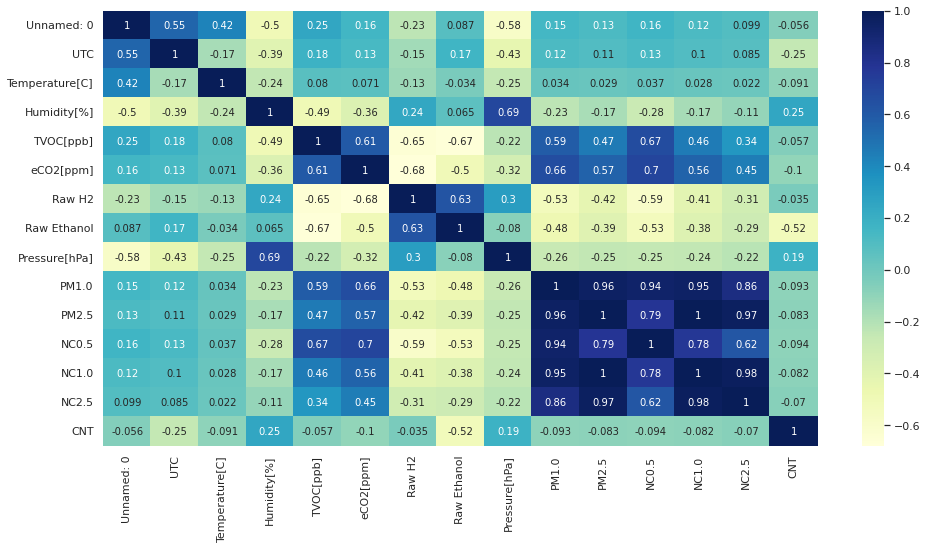

In [15]:
# Explore data visually
# Build Correlation Matrix to
correlation = df_train_copy.corr()
#print(correlation)

fig , ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
sns.heatmap(correlation,annot=True,cmap="YlGnBu")

**Conclusion 1.4**

We can see there is very high correlation between PMs and NCs Data.
Also we can find some unwanted columns, like Unnamed, UTC and CNT, those columns has nothing to do with data.
Therefore going further we will drop the unwanted columns and columns with high correlations.

**2. Data Preprocessing**

**2.1 Data Cleaning**

Removing columns with unwanted values and Very High Corellation

In [16]:
x_train = x_train.drop(['Unnamed: 0', 'UTC', 'CNT',"PM1.0", "PM2.5", "NC2.5"], axis=1)
x_test = x_test.drop(['Unnamed: 0', 'UTC', 'CNT',"PM1.0", "PM2.5", "NC2.5"], axis=1)

In [17]:
x_train.describe()
x_train.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'NC0.5', 'NC1.0'],
      dtype='object')

**2.2 Feature Scaling using StandardScaller**

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(x_train)
scaled_data = model.transform(x_train)
x_train_tr = pd.DataFrame(scaled_data)
x_train_tr.columns = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'NC0.5', 'NC1.0']
x_train_tr.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,NC1.0
count,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04,5.010400e+04
mean,8.374092e-17,2.158403e-16,1.375592e-17,-1.340138e-17,-6.169245e-16,-2.858040e-15,3.548459e-14,2.127204e-18,8.154281e-18
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-2.641423e+00,-4.281348e+00,-2.485160e-01,-1.402998e-01,-8.403246e+00,-7.300395e+00,-5.887417e+00,-1.145881e-01,-9.076504e-02
25%,-3.457470e-01,-1.158733e-01,-2.319224e-01,-1.402998e-01,-4.176773e-01,-5.272137e-01,5.215788e-02,-1.124939e-01,-9.015125e-02
50%,2.905531e-01,1.807710e-01,-1.221991e-01,-1.402998e-01,-7.047871e-02,-4.186586e-01,1.407066e-01,-1.116463e-01,-8.990538e-02
75%,6.583905e-01,5.306301e-01,-9.557219e-02,-1.201050e-01,6.128378e-01,5.307875e-01,5.940457e-01,-1.111836e-01,-8.977051e-02
max,3.063781e+00,3.017007e+00,7.469421e+00,3.153365e+01,3.176198e+00,2.721216e+00,9.308336e-01,1.440121e+01,2.286658e+01


Performing Standard Scalling on Test set

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(x_test)
scaled_data = model.transform(x_test)
x_test_tr = pd.DataFrame(scaled_data)
x_test_tr.columns = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'NC0.5', 'NC1.0']
x_test_tr.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,NC1.0
count,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04,1.252600e+04
mean,2.076151e-16,4.713883e-16,-1.134509e-17,-1.928665e-17,7.323253e-16,1.109549e-15,-4.429972e-14,-5.672543e-18,-5.672543e-19
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00
min,-2.659443e+00,-4.189821e+00,-2.490576e-01,-1.470891e-01,-8.136270e+00,-7.200485e+00,-5.663072e+00,-1.176935e-01,-9.761203e-02
25%,-3.491881e-01,-1.049146e-01,-2.325990e-01,-1.470891e-01,-3.901512e-01,-5.119713e-01,6.280846e-02,-1.157249e-01,-9.693976e-02
50%,2.839896e-01,1.840856e-01,-1.263089e-01,-1.470891e-01,-5.710037e-02,-4.014979e-01,1.445234e-01,-1.148672e-01,-9.665338e-02
75%,6.507294e-01,5.317194e-01,-9.942232e-02,-1.282098e-01,6.018390e-01,5.310275e-01,5.893954e-01,-1.144064e-01,-9.649773e-02
max,3.051981e+00,2.956264e+00,7.289243e+00,2.965955e+01,3.083605e+00,2.685259e+00,9.098710e-01,1.389438e+01,2.526527e+01


**3. Model Building**

**3.1. Build different Classification models and checking the performance for each**

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_tr, y_train)
lr_accuracy = lr.score(x_test_tr, y_test)
print(f"Accuracy of Logistic Regression Model ---> {lr_accuracy}")
lr_predict = lr.predict(x_test_tr)

Accuracy of Logistic Regression Model ---> 0.8951780296982277


In [21]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(x_train_tr, y_train)
dt_accuracy = dt.score(x_test_tr, y_test)
print(f"Accuracy of Decision Tree Model ---> {dt_accuracy}")
dt_predict = dt.predict(x_test_tr)

Accuracy of Decision Tree Model ---> 0.9329394858693917


In [22]:
from sklearn.ensemble import RandomForestClassifier  
rf = RandomForestClassifier()
rf.fit(x_train_tr, y_train)
rf_accuracy = rf.score(x_test_tr, y_test)
print(f"Accuracy of Random Forest Model ---> {rf_accuracy}")
rf_predict = rf.predict(x_test_tr)

Accuracy of Random Forest Model ---> 0.964154558518282


In [23]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train_tr, y_train)
ada_accuracy = model.score(x_test_tr, y_test)
print(f"Accuracy of AdaBoost Model ---> {ada_accuracy}")
ada_predict = model.predict(x_test_tr)

Accuracy of AdaBoost Model ---> 0.9314226409069136


**Conclusion 3.1**

Accuracy of Logistic Regression Model ---> 0.89517

Accuracy of Decision Tree Model ---> 0.93309

Accuracy of Random Forest Model ---> 0.964394

Accuracy of AdaBoost Model ---> 0.93142

We can see that Random forest performs the best which is close to 97%, as compare to other classsfication models.

Now lets check the performance measure for all these models using some other techniques for better score accuracy.

**4. Further Performance Analysis**

**4.1. Confusion Matrix**

In [24]:
lr_cnf_matrix = confusion_matrix(y_test, lr_predict)
dt_cnf_matrix = confusion_matrix(y_test, dt_predict)
rf_cnf_matrix = confusion_matrix(y_test, rf_predict)
ada_cnf_matrix = confusion_matrix(y_test, ada_predict)
print(f"CM for LR ---> {lr_cnf_matrix}")
print(f"CM for LR ---> {dt_cnf_matrix}")
print(f"CM for LR ---> {rf_cnf_matrix}")
print(f"CM for LR ---> {ada_cnf_matrix}")

CM for LR ---> [[2743  848]
 [ 465 8470]]
CM for LR ---> [[3591    0]
 [ 840 8095]]
CM for LR ---> [[3589    2]
 [ 447 8488]]
CM for LR ---> [[3583    8]
 [ 851 8084]]


CM for Logistic Regression
Confusion matrix, without normalization
[[2743  848]
 [ 465 8470]]
Normalized confusion matrix
[[0.76385408 0.23614592]
 [0.05204253 0.94795747]]


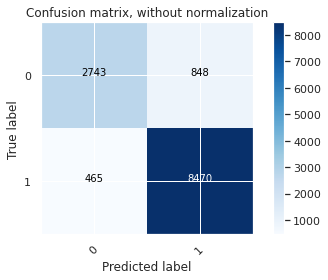

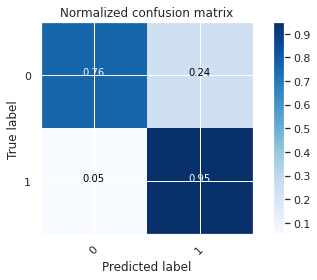

In [25]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    
    #Without Normalization
print("CM for Logistic Regression")
plt.figure()
plot_confusion_matrix(lr_cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(lr_cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

CM for Decision Tree
Confusion matrix, without normalization
[[3591    0]
 [ 840 8095]]
Normalized confusion matrix
[[1.         0.        ]
 [0.09401231 0.90598769]]


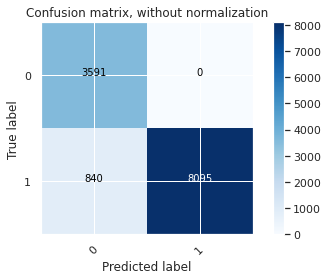

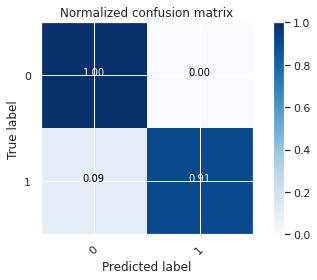

In [26]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    
    #Without Normalization
print("CM for Decision Tree")
plt.figure()
plot_confusion_matrix(dt_cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(dt_cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

CM for Random Forest
Confusion matrix, without normalization
[[3589    2]
 [ 447 8488]]
Normalized confusion matrix
[[9.99443052e-01 5.56947925e-04]
 [5.00279799e-02 9.49972020e-01]]


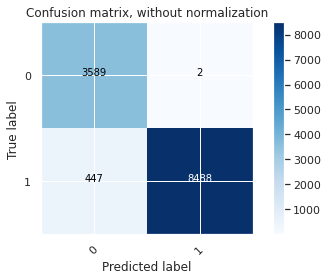

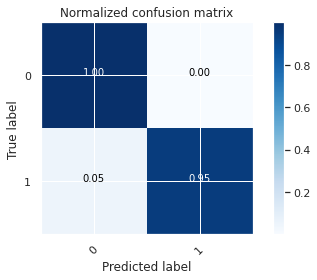

In [27]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    
    #Without Normalization
print("CM for Random Forest")
plt.figure()
plot_confusion_matrix(rf_cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(rf_cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

CM for Ada Boost
Confusion matrix, without normalization
[[3583    8]
 [ 851 8084]]
Normalized confusion matrix
[[0.99777221 0.00222779]
 [0.09524342 0.90475658]]


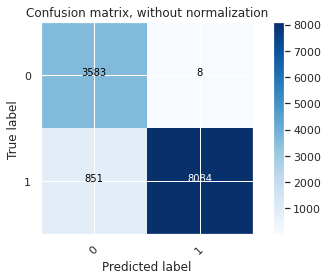

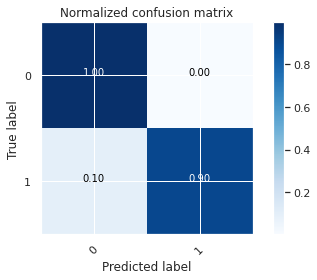

In [28]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    
    #Without Normalization
print("CM for Ada Boost")
plt.figure()
plot_confusion_matrix(ada_cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(ada_cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**Conclusion 4.2**

This are the percentage of confusion Matrix for Prediction the Smoke Alarm when its ON or 1.

CM for Logistic Regression --> 95%

CM for Decission Tree --> 91%

CM for Random Forest --> 95%

CM for ADA boost --> 90%

We can see Randome Forest and Logistic Regression is performing the best, but CM is not where we will stop test the accuracy.

**4.2. Precision and Recall**

**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes

**Recall** identifies the proportion of correctly predicted actual positives.

**f1-score** is the weighted harmonic mean of precision and recall. 
The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall.

**Support** is the actual number of occurrences of the class in our dataset.

In [29]:
from sklearn.metrics import precision_score
lr_precision = precision_score(y_test, lr_predict)
dt_precision = precision_score(y_test, dt_predict)
rf_precision = precision_score(y_test, rf_predict)
ada_precision = precision_score(y_test, ada_predict)
# np.set_printoptions(precision=2)
print(f"Precision_Score for LR ---> {lr_precision}")
print(f"Precision_Score for DT --->{dt_precision}")
print(f"Precision_Score for RF --->{rf_precision}")
print(f"Precision_Score for ADA --->{ada_precision}")

Precision_Score for LR ---> 0.9089933462116334
Precision_Score for DT --->1.0
Precision_Score for RF --->0.9997644287396937
Precision_Score for ADA --->0.9990113692535838


**Conclusion Precision Score**

As you can see that some classifiesr are giving teh accuracy of 1 i.e 100%, which is not quite possible.

So let's check the accuracy score futher using other metrics too.

In [30]:
from sklearn.metrics import recall_score 
lr_recall= recall_score(y_test, lr_predict)
dt_recall= recall_score(y_test, dt_predict)
rf_recall= recall_score(y_test, rf_predict)
ada_recall = recall_score(y_test, ada_predict)
# np.set_printoptions(precision=2)
print(f"Recall_score for LR ---> {lr_recall}")
print(f"Recall_score for DT --->{dt_recall}")
print(f"Recall_score for RF --->{rf_recall}")
print(f"Recall_score for ADA --->{ada_recall}")

Recall_score for LR ---> 0.9479574706211528
Recall_score for DT --->0.9059876888640179
Recall_score for RF --->0.9499720201454952
Recall_score for ADA --->0.9047565752658087


**Conclusion Recall Score**

Here we have quite decent accuraccy and also we can notice Random forest is still performing the best till now.

**4.3. F1 Score**

In [31]:
from sklearn.metrics import f1_score
lr_f1_score = f1_score(y_test, lr_predict)
dt_f1_score = f1_score(y_test, dt_predict)
rf_f1_score = f1_score(y_test, rf_predict)
ada_f1_score = f1_score(y_test, ada_predict)
# np.set_printoptions(precision=2)
print(f"F1 Score for LR ---> {lr_f1_score}")
print(f"F1 Score for DT --->{dt_f1_score}")
print(f"F1 Score for RF --->{rf_f1_score}")
print(f"F1 Score for ADA --->{ada_f1_score}")

F1 Score for LR ---> 0.9280666191858873
F1 Score for DT --->0.9506752789195537
F1 Score for RF --->0.974232424677188
F1 Score for ADA --->0.9495507135725613


**Conclusion F1 Score**
Now we have the final Accuracy as F1 Score, which says that Random Forest is the model which is again Performing the best.

**5. FINAL CONCLUSION¶**

We have tested our Data using different Classification Models, and also check the accuracy score using various metrix methods.

We saw that in most of the metrix methods, Random Forest is the model which performes best on the given Data Set.

Hence we can conclude that Random Forest probably be the best model for this data as compare with another models.

But Dataset is imbalance dataset.

**Handling imbalance of data**

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In this example we use RandomUnderSampler method
Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.

In [40]:
from imblearn.under_sampling import RandomUnderSampler
nm=RandomUnderSampler()
x_train_nm,y_train_nm=nm.fit_resample(x_train_tr, y_train)
y_train_nm.value_counts()

0    14282
1    14282
Name: Fire Alarm, dtype: int64

In [45]:
clf2 = RandomForestClassifier(criterion= "entropy",random_state= 21)
clf2.fit(x_train_nm, y_train_nm)
y_predicted2 = clf2.predict(x_test)
score1 = clf2.score(x_test,y_test)

In [46]:
print("Accuracy % of Random forest on test data after handling imbalace of data: {}".format(score1))

Accuracy % of Random forest on test data after handling imbalace of data: 0.7133163020916494


**#predictions with respect to new dataset**

In [45]:
x_test_tr.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'NC0.5', 'NC1.0'],
      dtype='object')

**Predicting -New data set-1**

In [31]:
#predictions with respect to new dataset
data_new={'Temperature[C]':0.253425, 'Humidity[%]': 0.653155, 'TVOC[ppb]':-0.247047, 'eCO2[ppm]':-0.147089, 'Raw H2':1.124693	,
       'Raw Ethanol':0.747100, 'Pressure[hPa]' :0.811375, 'NC0.5' :-0.114190, 'NC1.0' : -0.096425}          
index=[1]#serial number
my_data=pd.DataFrame(data_new,index)

In [32]:
print(my_data)

   Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]    Raw H2  Raw Ethanol  \
1        0.253425     0.653155  -0.247047  -0.147089  1.124693       0.7471   

   Pressure[hPa]    NC0.5     NC1.0  
1       0.811375 -0.11419 -0.096425  


In [107]:
my_data_fire=dt.predict(my_data)
fire = np.round(my_data_fire, 2)
print(f" The predicted fire label for the given data is :{fire}")

 The predicted fire label for the given data is :[0]


**Predicting -New data set-2**

In [55]:
#predictions with respect to new dataset
data_new2={'Temperature[C]':0.171176, 'Humidity[%]': 0.735409, 'TVOC[ppb]': -0.211743, 'eCO2[ppm]':-0.147089, 'Raw H2': 0.634070	,
       'Raw Ethanol': 0.360444, 'Pressure[hPa]' : 0.611466, 'NC0.5' :-0.117189, 'NC1.0' :-0.097441}  #x_test_tr.iloc[3179]         
index=[1]#serial number
my_data2=pd.DataFrame(data_new2,index)

In [108]:
my_data_fire2=dt.predict(my_data2)
fire2 = np.round(my_data_fire2, 2)
print(f" The predicted fire label for the given data is :{fire2}")

 The predicted fire label for the given data is :[1]


In [58]:
#x_test_tr.iloc[3180]

In [59]:
#df.iloc[3180]

**With Random Forest we are able to correctly Predict the target variable😊**